Importing Libraries and Reading Data


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Preprocessing Data

In [3]:
df.isna().any()

date     False
store    False
item     False
sales    False
dtype: bool

In [4]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


Converting date from yyyy-mm-dd to yyyy-mm

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m')
df.head()

,date,store,item,sales
0,2013-01,1,1,13
1,2013-01,1,1,11
2,2013-01,1,1,14
3,2013-01,1,1,13
4,2013-01,1,1,10


In [6]:
df_monthly = df.groupby(["date","item","store"]).sales.sum().reset_index()
df_monthly.head()

,date,item,store,sales
0,2013-01,1,1,328
1,2013-01,1,2,486
2,2013-01,1,3,453
3,2013-01,1,4,388
4,2013-01,1,5,294


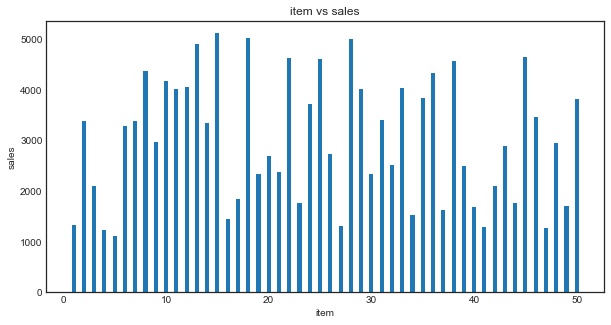

In [7]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_monthly['item'],df_monthly['sales'],width = 0.4)
plt.xlabel("item")
plt.ylabel("sales")
plt.title("item vs sales")
plt.show()

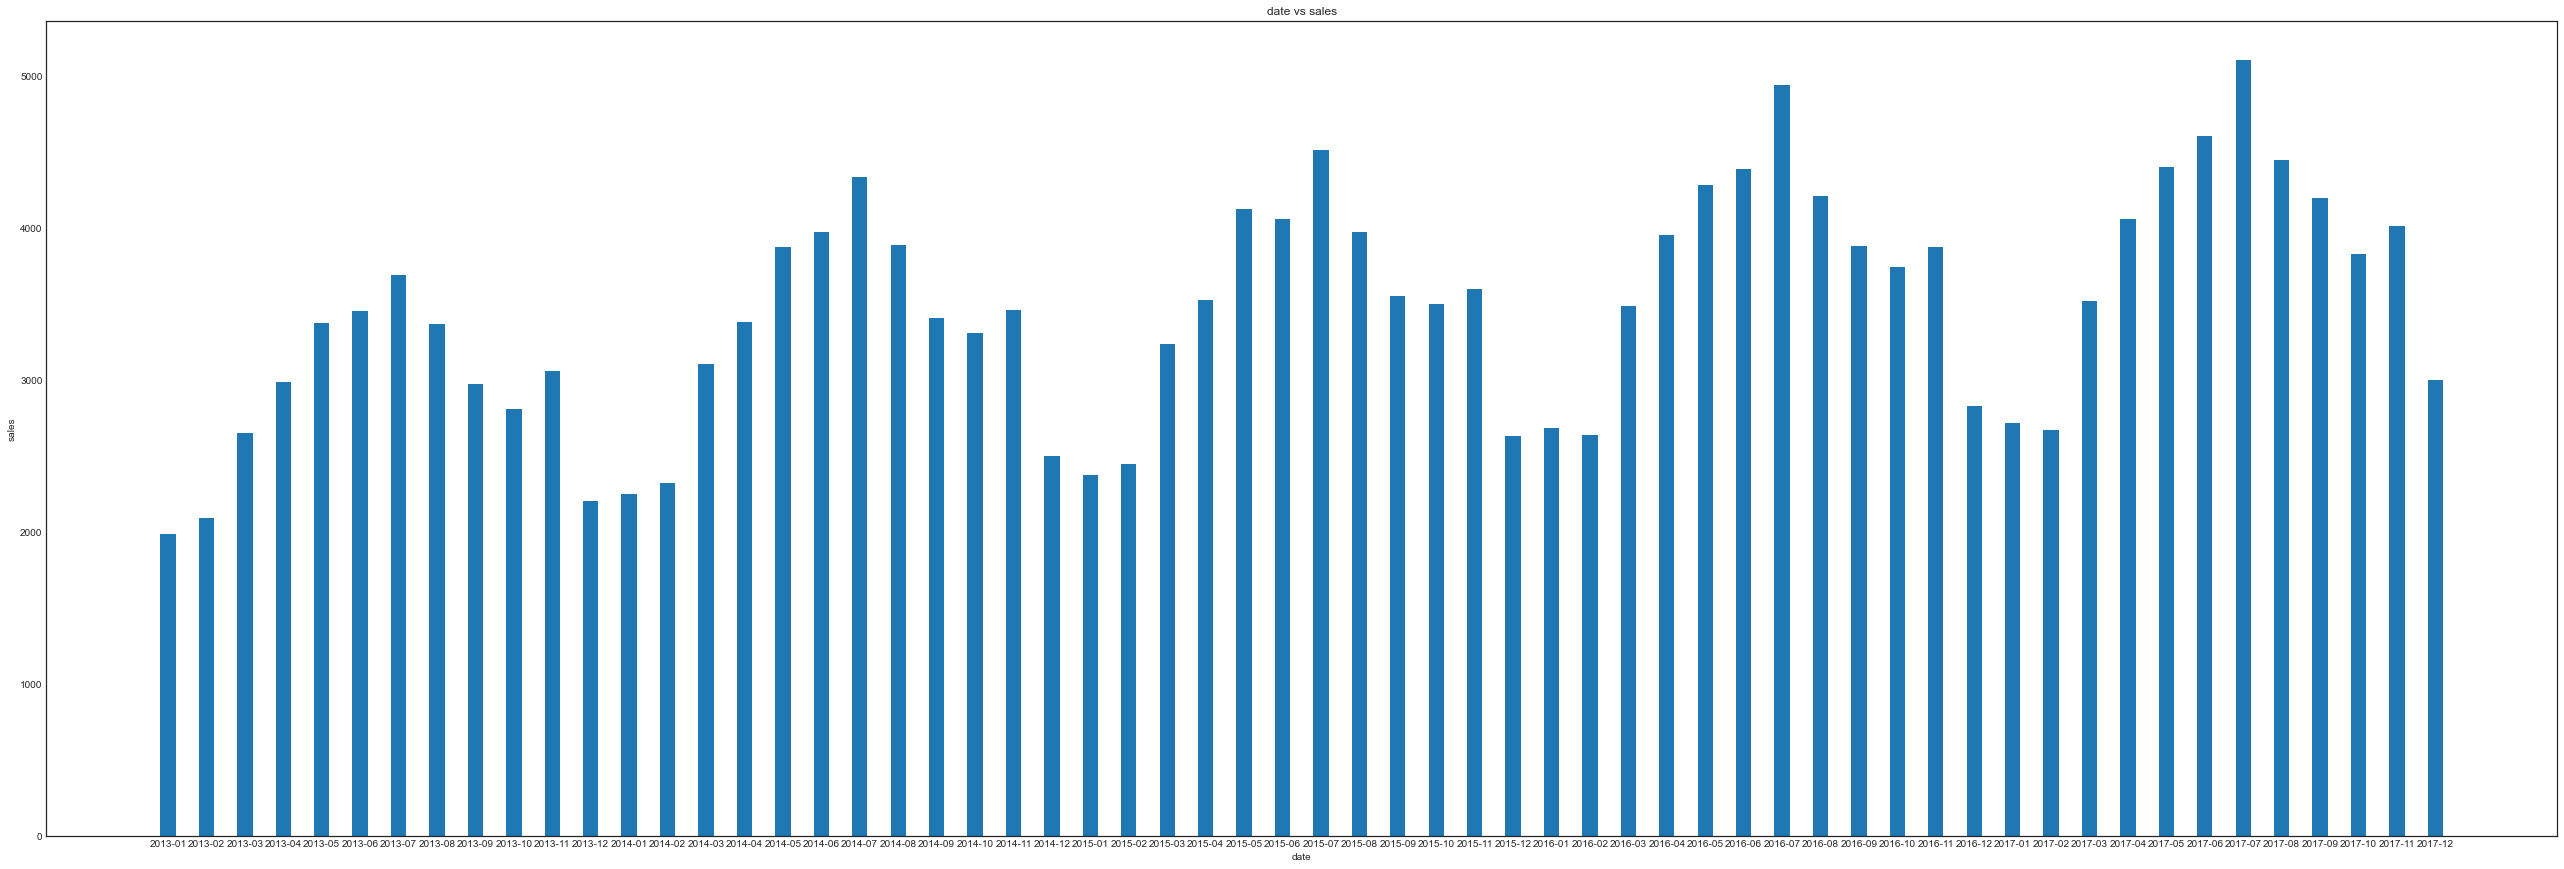

In [8]:
fig = plt.figure(figsize = (45, 15))
plt.bar(df_monthly['date'],df_monthly['sales'],width=0.4)
plt.xlabel("date")
plt.ylabel("sales")
plt.title("date vs sales")
plt.show()

converting date to mm format


In [9]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m')
df.head()

,date,store,item,sales
0,01,1,1,13
1,01,1,1,11
2,01,1,1,14
3,01,1,1,13
4,01,1,1,10


In [10]:
df_mm = df.groupby(["date","item","store"]).sales.sum().reset_index()
df_mm.head()

,date,item,store,sales
0,01,1,1,2125
1,01,1,2,2956
2,01,1,3,2637
3,01,1,4,2411
4,01,1,5,1763


In [11]:
df_mm.shape

(6000, 4)

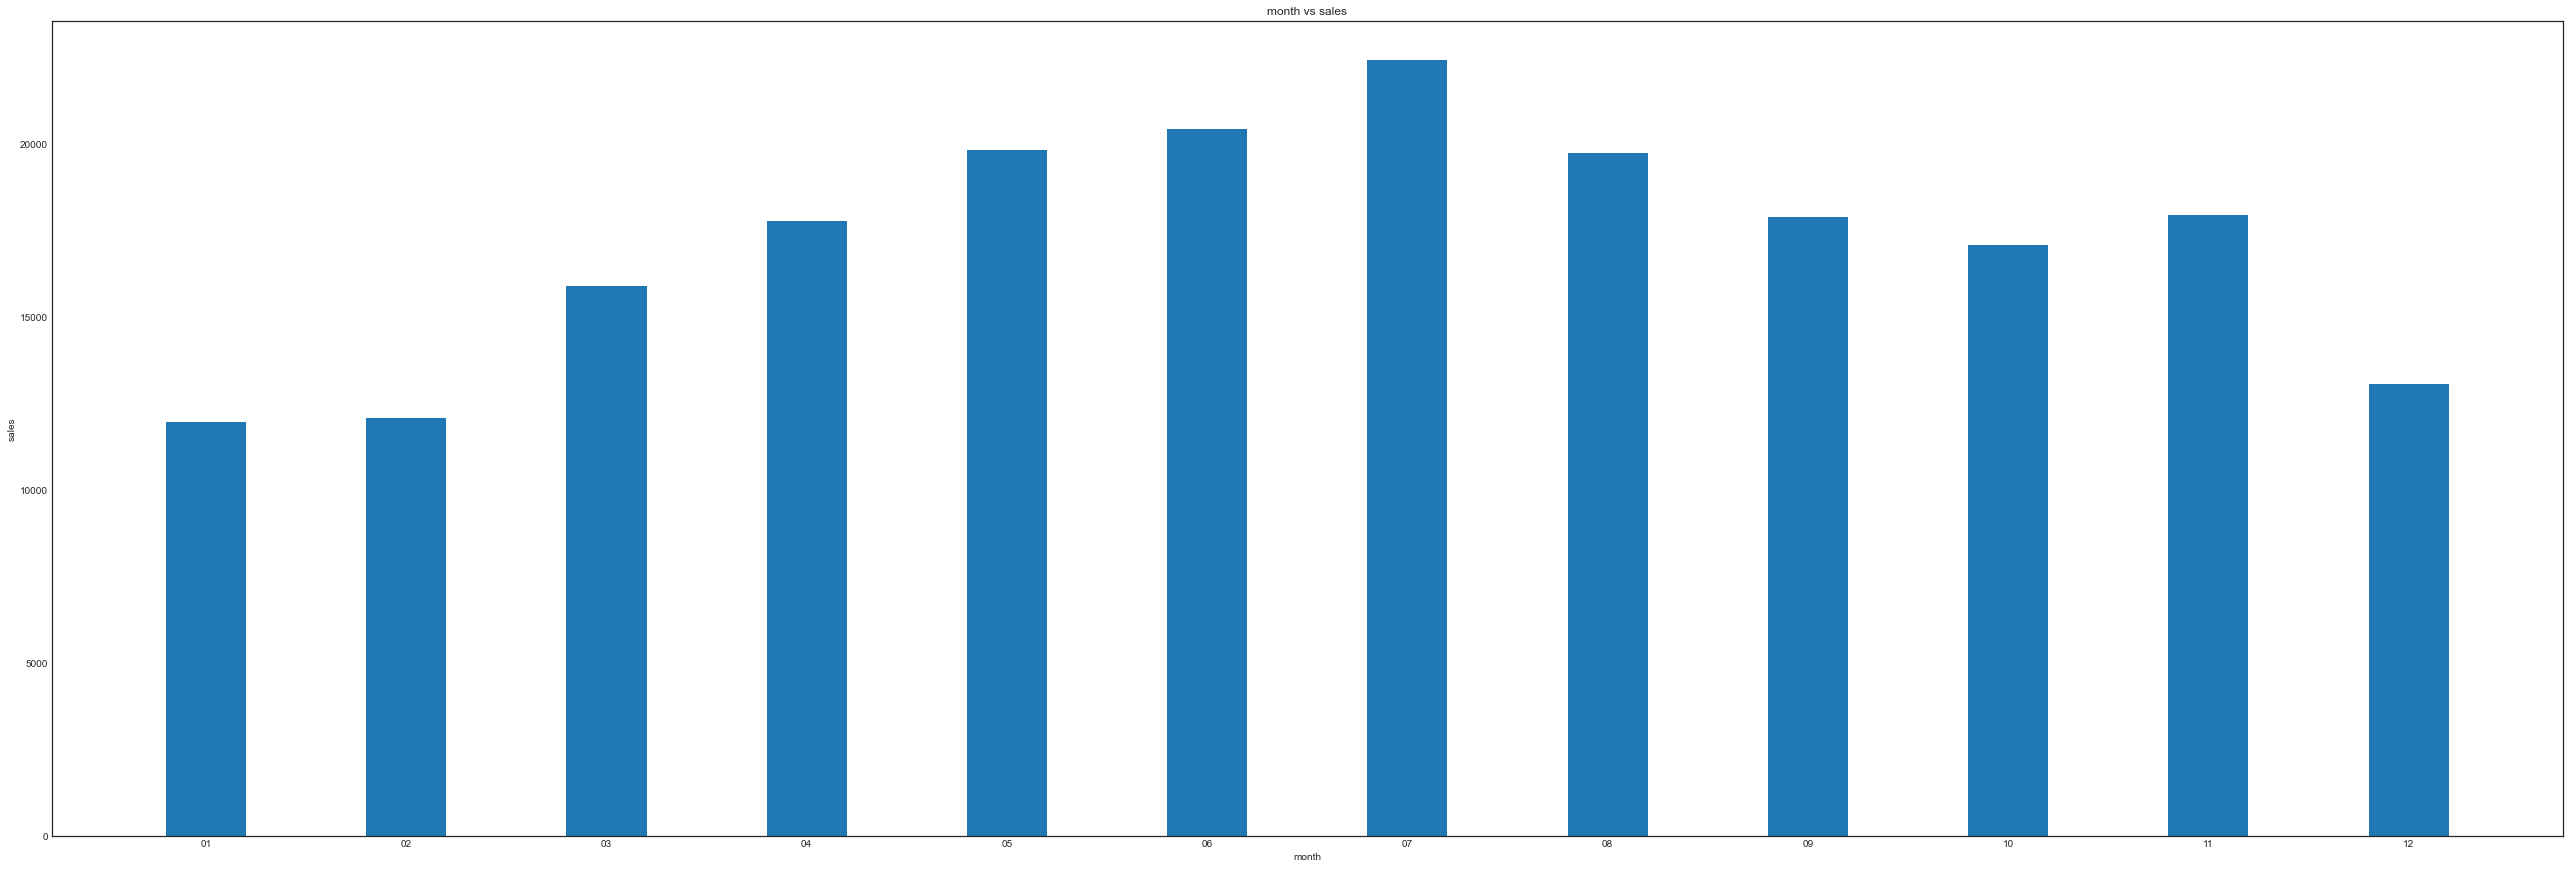

In [12]:
fig = plt.figure(figsize = (45, 15))
plt.bar(df_mm['date'],df_mm['sales'],width=0.4)
plt.xlabel("month")
plt.ylabel("sales")
plt.title("month vs sales")
plt.show()  

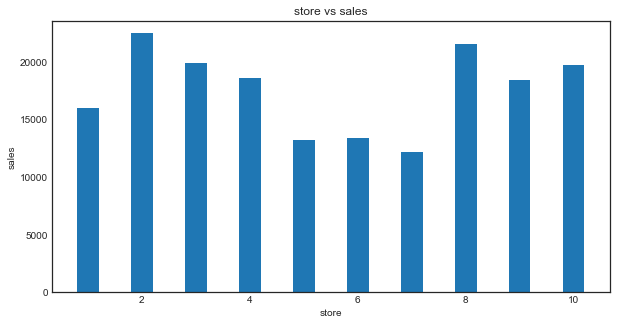

In [13]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_mm['store'],df_mm['sales'],width = 0.4)
plt.xlabel("store")
plt.ylabel("sales")
plt.title("store vs sales")
plt.show()

In [14]:
df_monthly.skew()

item     0.000000
store    0.000000
sales    0.743533
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2435759fc40>,
 'caps': [<matplotlib.lines.Line2D at 0x2435759a610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2435759f850>],
 'medians': [<matplotlib.lines.Line2D at 0x24369f67730>],
 'fliers': [<matplotlib.lines.Line2D at 0x24369f4c550>],
 'means': []}

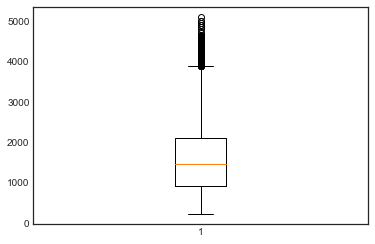

In [15]:
plt.boxplot(df_monthly['sales'], notch=None, vert=None, patch_artist=None, widths=None)

In [16]:
df_monthly = df_monthly[df_monthly['sales']<=4000].reset_index().drop('index', axis=1)

In [17]:
df_monthly.shape

(29828, 4)

In [18]:
df_monthly.head(10)

,date,item,store,sales
0,2013-01,1,1,328
1,2013-01,1,2,486
2,2013-01,1,3,453
3,2013-01,1,4,388
4,2013-01,1,5,294
5,2013-01,1,6,287
6,2013-01,1,7,256
7,2013-01,1,8,431
8,2013-01,1,9,424
9,2013-01,1,10,447


# Practice

## K means

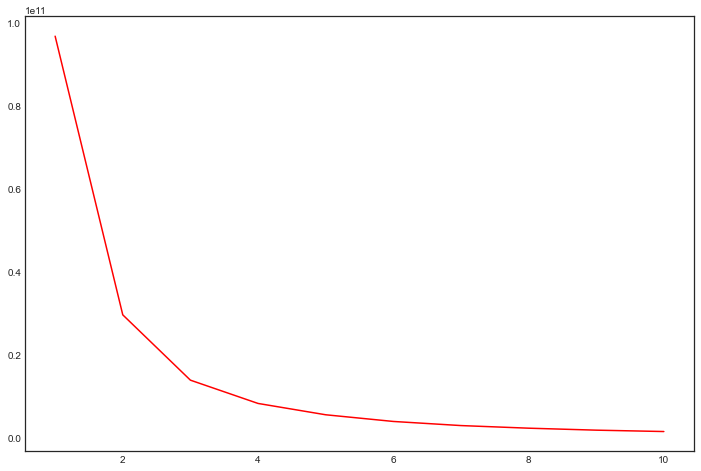

In [22]:
from sklearn.cluster import KMeans

cluster = []
for k in range (1, 11):
    kmean = KMeans(n_clusters=k).fit(df_mm)
    cluster.append(kmean.inertia_)
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), cluster, 'r-')
plt.show()

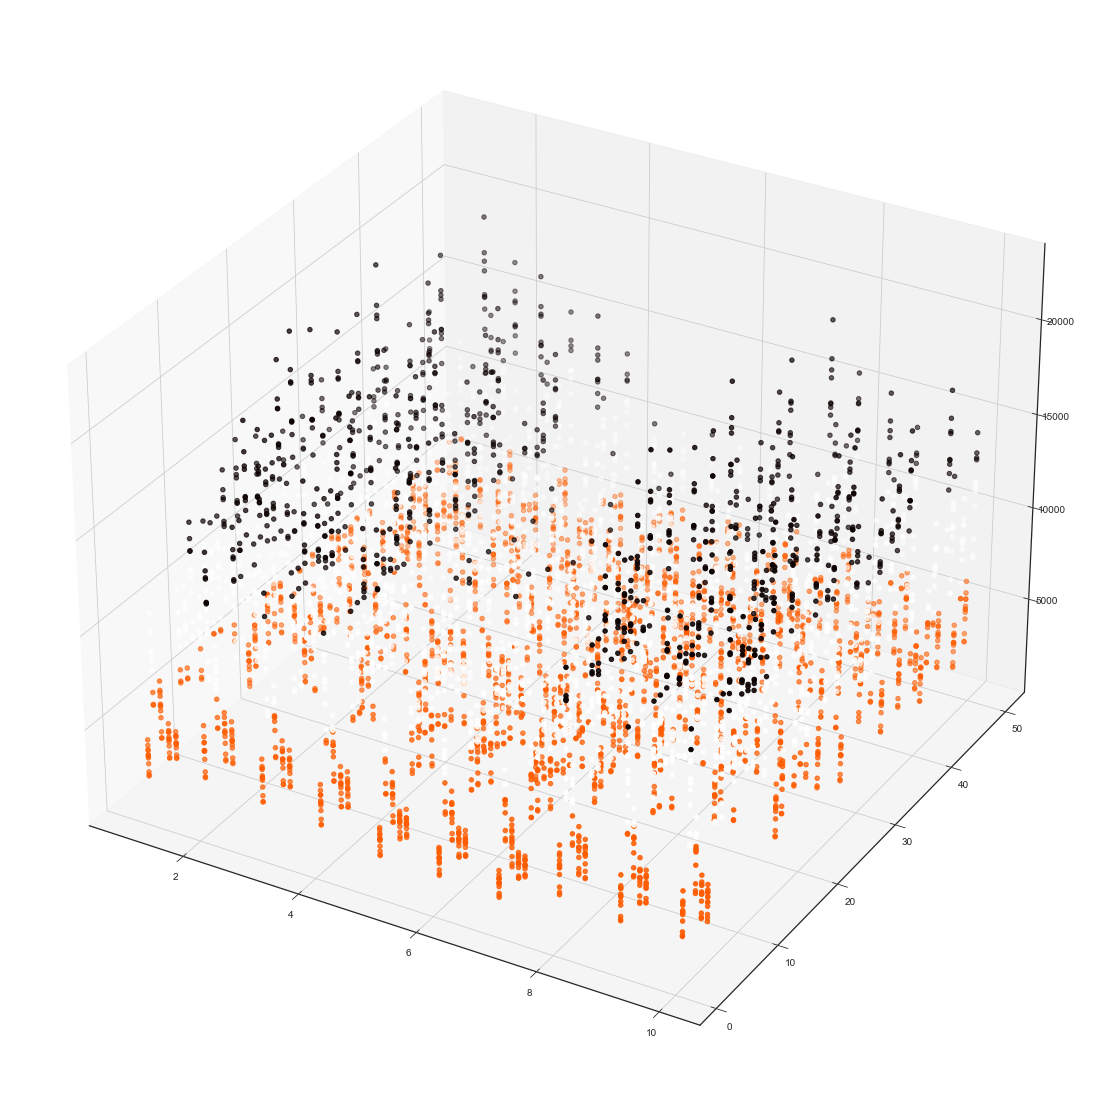

In [33]:
#k=3

km = KMeans(n_clusters=3).fit(df_mm)
df_mm['Labels'] = km.labels_
plt.figure(figsize=(20, 20))
ax = plt.axes(projection ="3d")

ax.scatter(df_mm['store'], df_mm['item'], df_mm['sales'], c = df_mm['Labels'], cmap = plt.hot())
plt.show()

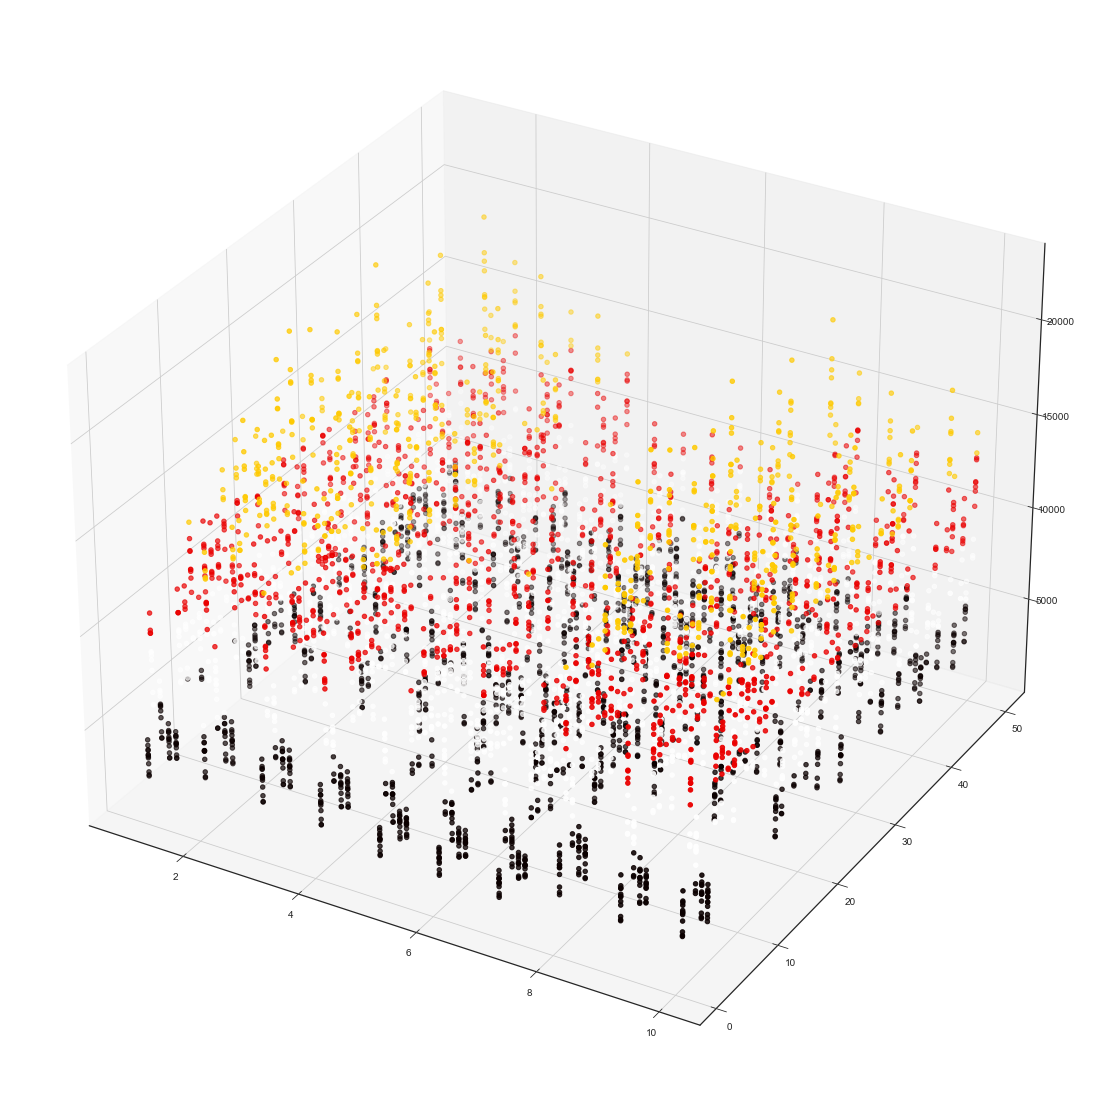

In [34]:
#k=4

km = KMeans(n_clusters=4).fit(df_mm)
df_mm['Labels'] = km.labels_
plt.figure(figsize=(20, 20))
ax = plt.axes(projection ="3d")

ax.scatter(df_mm['store'], df_mm['item'], df_mm['sales'], c = df_mm['Labels'], cmap = plt.hot())
plt.show()

## Agglomerative Clustering

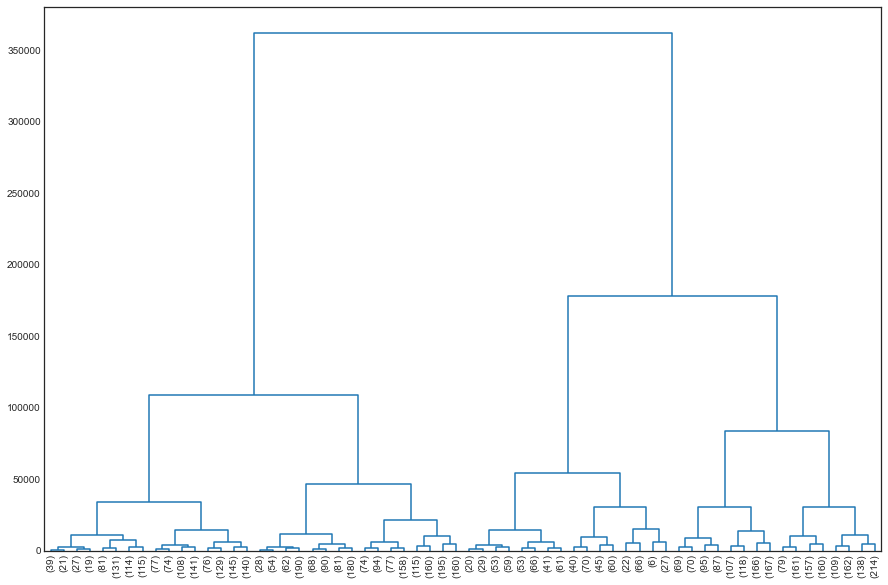

In [38]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(df_mm,method="ward")

plt.figure(figsize=(15,10))
dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.show()

In [69]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster.fit_predict(df_mm)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

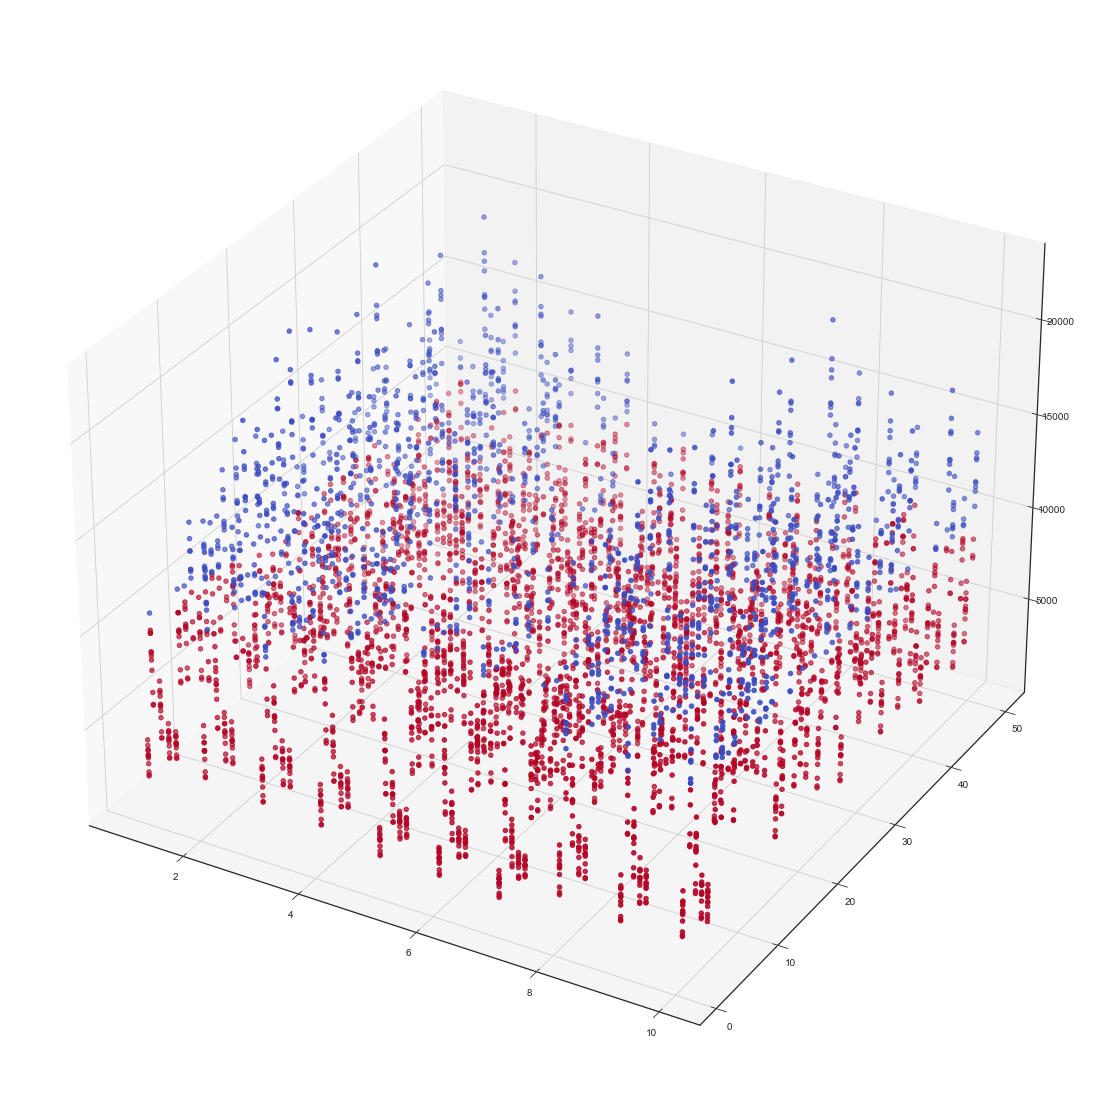

In [70]:
plt.figure(figsize=(20, 20))
ax = plt.axes(projection ="3d")

ax.scatter(df_mm['store'], df_mm['item'], df_mm['sales'], c = cluster.labels_, cmap = 'coolwarm')
plt.show()

## DBSCAN

In [71]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df_mm)

DBSCAN()

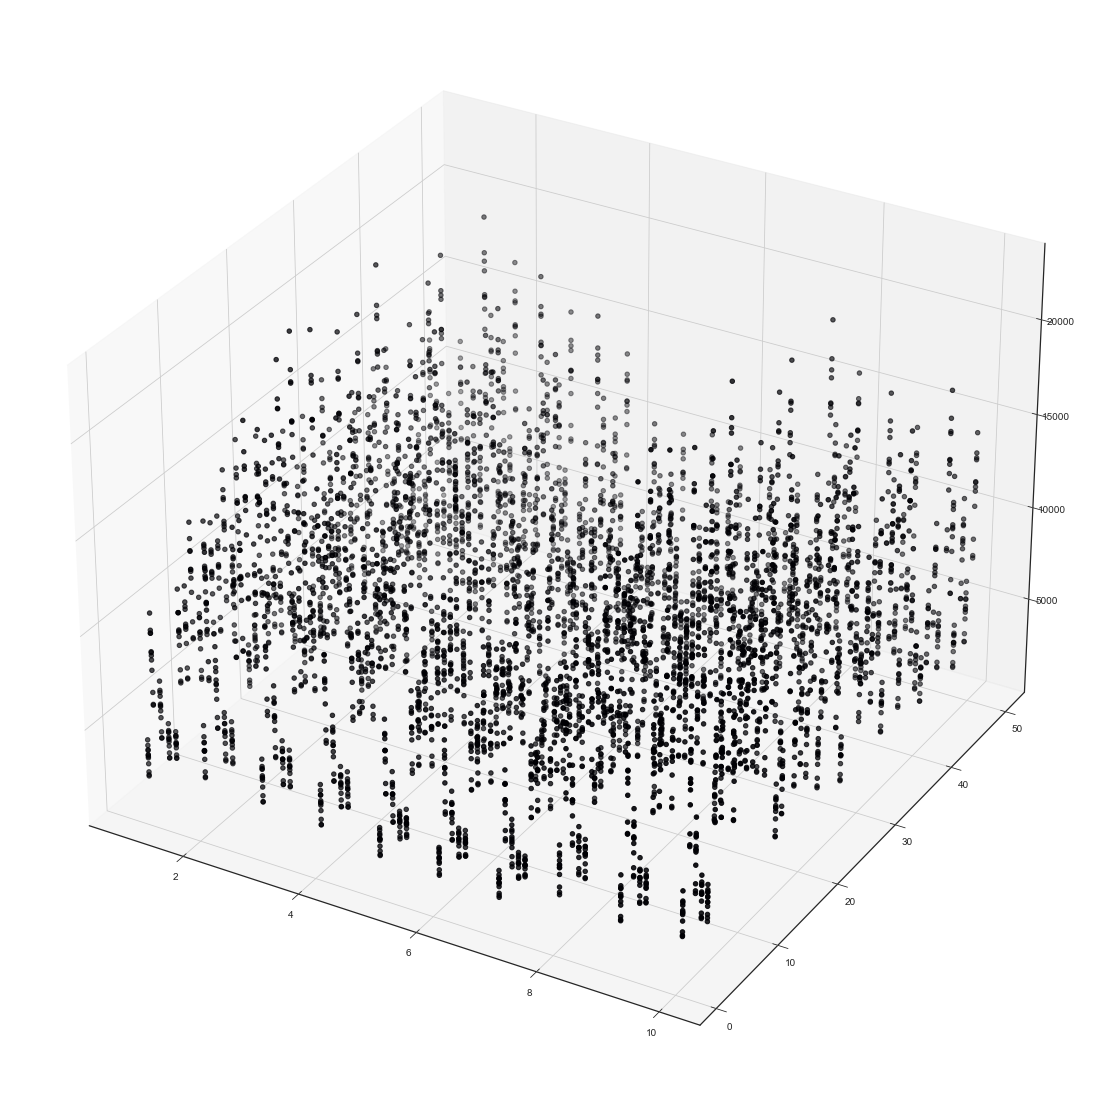

In [80]:
df_mm['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(20, 20))
ax = plt.axes(projection ="3d")

ax.scatter(df_mm['store'], df_mm['item'], df_mm['sales'], c = df_mm['DBSCAN_labels'], cmap = 'magma')
plt.show()